In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# COMP 598 - Lecture 4: Linear Classification



### Subset Selection

From the *Gauss-Markov Theorem* the *least-squares* solution of $\hat{w}$ have the smallest variance among all linear unbiased esimates.

We can find a lower variance solution at the expense of some bias. We can select a subset of features with non-zero weights. We can then use regression to estimate the weights of the selected features.

How does one choose such features?


## Regularization

- we penalize highly complex models to prevent overfitting by adding an extra term into our error function.

Original: $Err(w) = \sum_{i=1}^n (y_i - w^Tx_i)^2$
Regularized: $Err(w) = \sum_{i=1}^n (y_i - w^Tx_i)^2 + \lambda \times \text{PENALTY}$

Here $\lambda$ is the hyperparameter that will put a weight on the penalty. We can the select this manually or by cross validation.

### L2-Regularization / Ridge Regression

Here we set $\text{PENALTY}= \sum_{j=0}^m w_j**2$, (note we sum over the weights). Using a little algebra we can obtain a closed form solution:

$$ \hat{w}_{ridge} = (X^T X + \lambda I)^{-1} X^T Y $$.

Note however, now that the solution is not equivariant under scaling. We need to **normalize** the inputs:

$$ X_{normalized} = \frac{X - \mu}{\sigma}$$

Where $\mu$ and $\sigma$ are the mean and standard deviation of $X$.

Using this we smoothen the solution and effectively shrink the weights and drive some of them to 0.


### L1-Regularization / Lasso Regression

Here we set $\text{PENALTY} = \sum_{j=0}^m |w_j|$. Here there is no way to obtain a closed form solution, instead we need to solve a *quadratic programming problem*. This means it is more computationally expensive comapred to L2. 

Here too we set the less relevant important features to zero.

Other evaluation functions also exist, refer slides for others. (They make different assumptions)

## Classification

Given data $D=(X,Y)$ where $Y \in {0,1}$ is a binary classification of some target event (can be extended to multi-class).

Examples are text classificaiton, face detection, financial forecasting.

(-0.1, 1.1)

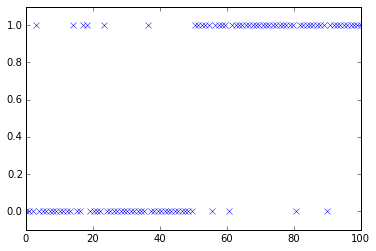

In [25]:
x = np.linspace(0,100, 100)
y = np.array(map(int,(x > len(x)/2))) 

# simulate some noise
y[ np.random.randint(0,len(x),size=len(x)/8) ] = 0
y[ np.random.randint(0,len(x),size=len(x)/8) ] = 1
plt.plot(x,y, 'x')
plt.ylim([-0.1,1.1])

What happens if we apply linear regression to this data?

ERROR: [[ 13.4810441]]


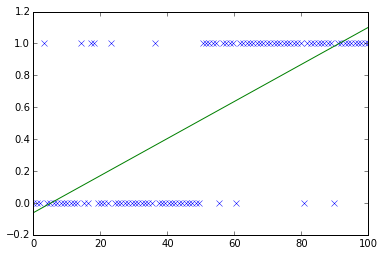

In [52]:
from ML import add_bias_term, least_squares, Hypothesis, mean_squared_error
X = np.matrix(x).T
X = add_bias_term(X)
Y = np.matrix(y).T
h = Hypothesis.linear(least_squares(X,Y))
y_pred = h(np.matrix(np.linspace(0,100,100)).T)
plt.plot(x,y,'x')
plt.plot(x, y_pred)

print 'ERROR:',mean_squared_error(X,Y,least_squares(X,Y))

As we can see the predictions are quite bad.

This is a prime candidate for a classificaiton problem.

There are two approaches we can make:

1. **Discriminative Learning** - Directly estimating $P(y | x)$ (i.e. learning what disciminates the data points, and learning a direct fit to the data)
2. **Generative Learning** - Separately model $P(x | Y)$ and $P(y)$. Use these through Bayes Rule to estimate P(y | x). Here we discover how the $X$ are generated for each class $y$, we are learning the underlying generative procedure.

## From Bayes to the Logistic Function

Supoose $y\in {0,1}$. What is the probability of a given input $x$ having a class of $y=1$?.

Applying Bayes Rule:

$$P(y=1 | x) = \frac{P(x~|~y=1) P(y=1)}{P(x)} = \frac{P(x~|~y=1) P(y=1)}{P(x~|~y=1) P(y=1) + P(x~|~y=0)P(y=0)} = \frac{1}{1 + \exp \Big(\ln \big( \frac{P(x~|~y=0)P(y=0)}{P(x~|~y=1)P(y=1)} \big) \Big)}$$ 

The derivation is the logistic function whos exponent is the log-odds ratio which can be simplified further by applying Bayes rule again and then some cancelling:
$$ a = \ln \frac{P(x~|~y=0)P(y=0)}{P(x~|~y=1)P(y=1)} = \ln \frac{P(y=1~|~x)}{P(y=0~|~x)}$$

## Logistic Regression
Now we can model the log-odds ratio using a linear function:
$$ a =  \ln \frac{P(y=1~|~x)}{P(y=0~|~x)} = w_0 + w_1x_1 + \ldots + w_mx_m = W^T x_i$$

A decision boundary is the set of points for which $a=0$

We can then use the logistic function to recreate our decision boundary:

$$ P_{y=1} = \sigma(w^T x_i) = \frac{1}{1 + e^{-w^Tx_i}}$$

Our question is now reduced to: How can we discover $W$?

Now we have the probability that $P_{y=1}, P_{y=0} = 1 - P_{y=1}$ . Assuming that the samples are independent and identically distributed, we can define the likelihood function $P(x_1, y_1, \ldots, x_n, y_n~|~w)$:

$$ \prod_{i=1}^n = \sigma(w^Tx_i)^{y_i} ( 1 - \sigma(w^Tx_i))^{1-y_i}$$

This can be inconvinient to minimize thus we can take the log and minimize that:

$$Err(w) = -\sum_{i=1}^n y_i \log(\sigma(w^Tx_i))+ (1-y_i)\log(1-\sigma(w^Tx_i))$$

We can now minimize this using gradient descent!

$$\frac{\delta Err(w)}{\delta w} = -\sum_{i=1}^n x_i (y_i - \sigma(w^T x_i))$$

And thus our gradient descent step becomes:

$$ w_{k+1} = w_k + \alpha_k \sum_{i=1}^n x_i (y_i - \sigma(w^T x_i))$$

and thus we can obtain $\hat{w}_{estimated}$. We've previously implemented gradient descent thus all we really need to do is encode our new derivative of the error function.

In [ ]:
# def derivative_of_log_likelihood(X,Y,w):
#     X * ( Y - sigma(W.T * X))

In [53]:
from ML import gradient_descent

In [ ]:
# gradient_descent()